In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("dataset_lol_games.csv")
df2 = pd.read_csv("dataset_lol_games_high_elo.csv")

In [3]:
frames = [df1, df2]
df = pd.concat(frames)

### Anzahl an unterschiedlichen Spielen in dem Datensatz vor dem bereinigen!

In [4]:
df["matchID"].nunique()

6704

Leider sind nicht alle Games zu verwenden. Nur Games mit einem Startgold von 500 Gold sind normale Spiele. Die Anderen sind Variationen. 5556 korrekte Games, 1221 Arams und 23 Andere (custom games, 1 vs 1).

In [5]:
df[df["minute"]==0]["player1_currentGold"].value_counts()

500     5556
1400    1221
950       23
Name: player1_currentGold, dtype: int64

In [6]:
games = df["matchID"].loc[(df["minute"] == 0) & (df["player1_currentGold"] == 500)]
df_correct_gamemode = df.loc[df["matchID"].isin(games)]

Von den verbleibenden Spielen muss überprüft werden, dass keine MatchID doppelt vorkommt.

In [7]:
df_cleaned = df_correct_gamemode.drop_duplicates(subset=["matchID", "minute"]).copy()

In [8]:
# print(df_cleaned["matchID"].nunique())
all_games = len(df[df["minute"]==0].index)
correct_gamemode_games = len(df_correct_gamemode[df_correct_gamemode["minute"]==0].index)
cleaned_games = len(df_cleaned[df_cleaned["minute"]==0].index)
print(f"Es gab {all_games} Spiele vor dem Bereinigen.")
print(f"Es gab {correct_gamemode_games} Spiele mit dem richtigen Gamemode.")
print(f"Es gab {cleaned_games} Spiele mit dem richtigen Gamemode und ohne Duplikate.")

Es gab 6800 Spiele vor dem Bereinigen.
Es gab 5556 Spiele mit dem richtigen Gamemode.
Es gab 5465 Spiele mit dem richtigen Gamemode und ohne Duplikate.


In [9]:
before = df[df["minute"]==0]["tier"].value_counts()

### Anzahl an Spielen je nach Rang vor und nach dem Bereinigen des Datensatzes

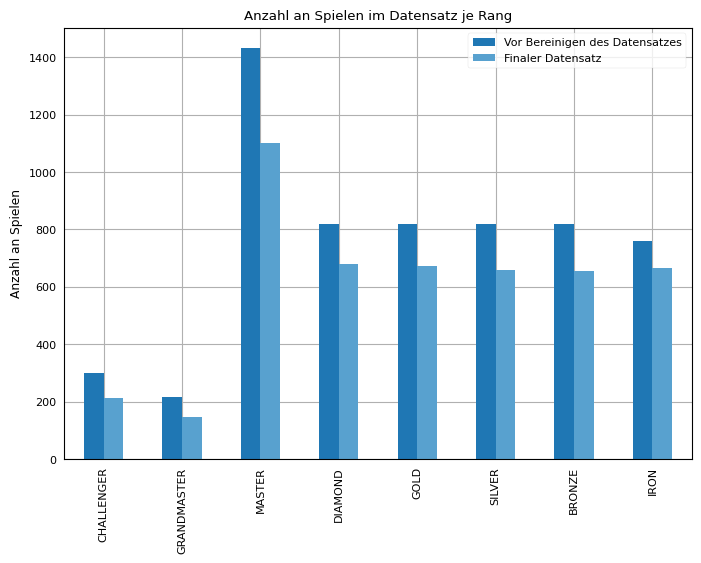

In [10]:
plt.style.use('_mpl-gallery')
plt.style.use('seaborn-v0_8-paper')


before = df[df["minute"]==0]["tier"].value_counts()
final = df_cleaned[df_cleaned["minute"]==0]["tier"].value_counts()

index = ["CHALLENGER", "GRANDMASTER", "MASTER", "DIAMOND", "GOLD", "SILVER", "BRONZE", "IRON"]
df_figure = pd.DataFrame({'Vor Bereinigen des Datensatzes': before, 'Finaler Datensatz': final}, index=index)


ax = df_figure.plot(kind='bar', title="Anzahl an Spielen im Datensatz je Rang", ylabel="Anzahl an Spielen")

### Anzahl an Spielen in denen Team 100 vs Team 200 gewinnt

In [11]:
winningTeam = df[df["minute"]==0]["winningTeam"].value_counts()

[Text(0, 0, '3436'), Text(0, 0, '3364')]

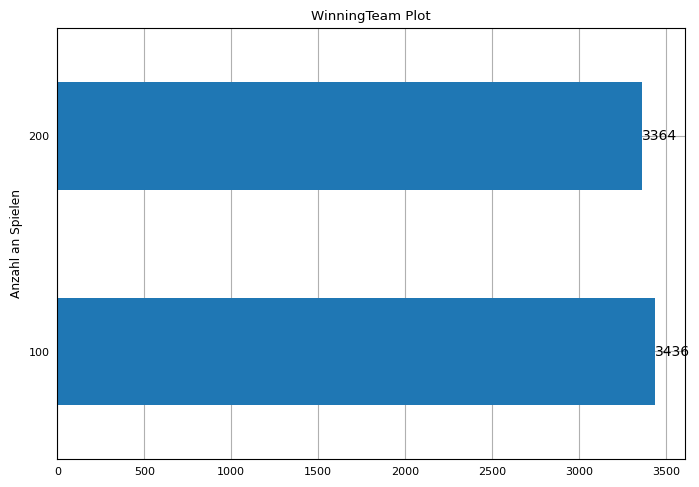

In [12]:
plt.style.use('_mpl-gallery')
plt.style.use('seaborn-v0_8-paper')
ax = winningTeam.plot(kind='barh', title='WinningTeam Plot', ylabel="Gewinnerteam", xlabel="Anzahl an Spielen")

ax.bar_label(ax.containers[0])

In [13]:
df_cleaned.drop(columns="Unnamed: 0", inplace=True)
df_cleaned.reset_index(inplace=True)

In [14]:
df_cleaned["winningTeam"] = (df_cleaned["winningTeam"] / 100) -1

### Für das Skilllevel soll es ein numerisches Zielfeature geben, welches sich aus tier und rank zusammensetzt


#### Es wird eine Skillwert zwischen 0-32 vergeben. 

In [15]:
dict_tier = { 'IRON': '0', 'BRONZE': '4', 'SILVER': '8', 
             'GOLD': '12', 'PLATINUM': '16', 'DIAMOND': '20', 
             'MASTER': '24', 'GRANDMASTER': '28', 'CHALLENGER': '32'}

In [47]:
dict_rank = { 'I': '3', 'II': '2', 'III': '1', 
             'IV': '0', '': '0'}

In [48]:
df_cleaned["skill_level"] = ""
for i, row in df_cleaned.iterrows():
    skill_level_from_tier = dict_tier.get(row["tier"])
    skill_level_from_rank = dict_rank.get(row["rank"])
    if skill_level_from_rank == None:
        skill_level_from_rank = 0 
    df_cleaned["skill_level"][i] = int(skill_level_from_tier) + int(skill_level_from_rank)

C:\Users\Florian\AppData\Local\Temp\ipykernel_2316\2208527929.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["skill_level"][i] = int(skill_level_from_tier) + int(skill_level_from_rank)


In [49]:
df_cleaned

,index,winningTeam,matchID,minute,tier,rank,player1_xp,player1_totalGold,player1_totalDamageDoneToChampions,player1_totalDamageTaken,...,player9_jungleMinionsKilled,player10_xp,player10_totalGold,player10_totalDamageDoneToChampions,player10_totalDamageTaken,player10_level,player10_currentGold,player10_minionsKilled,player10_jungleMinionsKilled,skill_level
0,0,0.0,EUW1_6158518894,0,DIAMOND,I,0,500,0,0,...,0,0,500,0,0,1,500,0,0,23
1,1,0.0,EUW1_6158518894,1,DIAMOND,I,0,500,0,0,...,0,0,500,0,0,1,0,0,0,23
2,2,0.0,EUW1_6158518894,2,DIAMOND,I,185,584,0,8,...,0,131,563,111,0,1,63,0,0,23
3,3,0.0,EUW1_6158518894,3,DIAMOND,I,670,839,687,502,...,0,508,777,521,630,2,277,0,0,23
4,4,0.0,EUW1_6158518894,4,DIAMOND,I,1103,1085,687,529,...,0,963,1168,851,981,3,668,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165183,52723,1.0,EUW1_6159432795,23,MASTER,NaN,11731,9731,10746,18749,...,4,7041,5824,4553,12997,10,584,7,0,24
165184,52724,1.0,EUW1_6159432795,24,MASTER,NaN,12537,10225,11565,20506,...,4,7111,5999,4553,13077,10,255,8,0,24
165185,52725,1.0,EUW1_6159432795,25,MASTER,NaN,13063,10661,11565,20695,...,4,7993,6515,4553,13209,11,770,8,4,24
165186,52726,1.0,EUW1_6159432795,26,MASTER,NaN,13213,10870,14866,23567,...,4,8729,7004,5283,15049,12,1259,8,4,24


In [60]:
df_cleaned.to_csv("Datensatz.csv")

### Normalisierung der Werte

In [50]:
# normalized_df=(df-df.min())/(df.max()-df.min())

### Heatmap 

In [51]:
import seaborn as sns

In [62]:
df_heatmap = df_cleaned.drop(columns=["index", "matchID", "tier", "rank"])

In [63]:
cols_xp_100 = ['player1_xp', 'player2_xp', "player3_xp", "player4_xp", "player5_xp"]
cols_xp_200 = ['player6_xp', 'player7_xp', "player8_xp", "player9_xp", "player10_xp"]
df_heatmap['xp_100'] = df_heatmap[cols_xp_100].sum(axis=1)
df_heatmap['xp_200'] = df_heatmap[cols_xp_200].sum(axis=1)
df_heatmap.drop(columns=cols_xp_100, inplace=True)
df_heatmap.drop(columns=cols_xp_200, inplace=True)

cols_totalGold_100 = ['player1_totalGold', 'player2_totalGold', "player3_totalGold", "player4_totalGold", "player5_totalGold"]
cols_totalGold_200 = ['player6_totalGold', 'player7_totalGold', "player8_totalGold", "player9_totalGold", "player10_totalGold"]
df_heatmap['totalGold_100'] = df_heatmap[cols_totalGold_100].sum(axis=1)
df_heatmap['totalGold_200'] = df_heatmap[cols_totalGold_200].sum(axis=1)
df_heatmap.drop(columns=cols_totalGold_100, inplace=True)
df_heatmap.drop(columns=cols_totalGold_200, inplace=True)

cols_totalDamageDoneToChampions_100 = ['player1_totalDamageDoneToChampions', 'player2_totalDamageDoneToChampions', "player3_totalDamageDoneToChampions", "player4_totalDamageDoneToChampions", "player5_totalDamageDoneToChampions"]
cols_totalDamageDoneToChampions_200 = ['player6_totalDamageDoneToChampions', 'player7_totalDamageDoneToChampions', "player8_totalDamageDoneToChampions", "player9_totalDamageDoneToChampions", "player10_totalDamageDoneToChampions"]
df_heatmap['totalDamageDoneToChampions_100'] = df_heatmap[cols_totalDamageDoneToChampions_100].sum(axis=1)
df_heatmap['totalDamageDoneToChampions_200'] = df_heatmap[cols_totalDamageDoneToChampions_200].sum(axis=1)
df_heatmap.drop(columns=cols_totalDamageDoneToChampions_100, inplace=True)
df_heatmap.drop(columns=cols_totalDamageDoneToChampions_200, inplace=True)

cols_totalDamageTaken_100 = ['player1_totalDamageTaken', 'player2_totalDamageTaken', "player3_totalDamageTaken", "player4_totalDamageTaken", "player5_totalDamageTaken"]
cols_totalDamageTaken_200 = ['player6_totalDamageTaken', 'player7_totalDamageTaken', "player8_totalDamageTaken", "player9_totalDamageTaken", "player10_totalDamageTaken"]
df_heatmap['totalDamageTaken_100'] = df_heatmap[cols_totalDamageTaken_100].sum(axis=1)
df_heatmap['totalDamageTaken_200'] = df_heatmap[cols_totalDamageTaken_200].sum(axis=1)
df_heatmap.drop(columns=cols_totalDamageTaken_100, inplace=True)
df_heatmap.drop(columns=cols_totalDamageTaken_200, inplace=True)

cols_level_100 = ['player1_level', 'player2_level', "player3_level", "player4_level", "player5_level"]
cols_level_200 = ['player6_level', 'player7_level', "player8_level", "player9_level", "player10_level"]
df_heatmap['level_100'] = df_heatmap[cols_level_100].sum(axis=1)
df_heatmap['level_200'] = df_heatmap[cols_level_200].sum(axis=1)
df_heatmap.drop(columns=cols_level_100, inplace=True)
df_heatmap.drop(columns=cols_level_200, inplace=True)

cols_currentGold_100 = ['player1_currentGold', 'player2_currentGold', "player3_currentGold", "player4_currentGold", "player5_currentGold"]
cols_currentGold_200 = ['player6_currentGold', 'player7_currentGold', "player8_currentGold", "player9_currentGold", "player10_currentGold"]
df_heatmap['currentGold_100'] = df_heatmap[cols_currentGold_100].sum(axis=1)
df_heatmap['currentGold_200'] = df_heatmap[cols_currentGold_200].sum(axis=1)
df_heatmap.drop(columns=cols_currentGold_100, inplace=True)
df_heatmap.drop(columns=cols_currentGold_200, inplace=True)

cols_minionsKilled_100 = ['player1_minionsKilled', 'player2_minionsKilled', "player3_minionsKilled", "player4_minionsKilled", "player5_minionsKilled"]
cols_minionsKilled_200 = ['player6_minionsKilled', 'player7_minionsKilled', "player8_minionsKilled", "player9_minionsKilled", "player10_minionsKilled"]
df_heatmap['minionsKilled_100'] = df_heatmap[cols_minionsKilled_100].sum(axis=1)
df_heatmap['minionsKilled_200'] = df_heatmap[cols_minionsKilled_200].sum(axis=1)
df_heatmap.drop(columns=cols_minionsKilled_100, inplace=True)
df_heatmap.drop(columns=cols_minionsKilled_200, inplace=True)
                
cols_jungleMinionsKilled_100 = ['player1_jungleMinionsKilled', 'player2_jungleMinionsKilled', "player3_jungleMinionsKilled", "player4_jungleMinionsKilled", "player5_jungleMinionsKilled"]
cols_jungleMinionsKilled_200 = ['player6_jungleMinionsKilled', 'player7_jungleMinionsKilled', "player8_jungleMinionsKilled", "player9_jungleMinionsKilled", "player10_jungleMinionsKilled"]
df_heatmap['jungleMinionsKilled_100'] = df_heatmap[cols_jungleMinionsKilled_100].sum(axis=1)
df_heatmap['jungleMinionsKilled_200'] = df_heatmap[cols_jungleMinionsKilled_200].sum(axis=1)
df_heatmap.drop(columns=cols_jungleMinionsKilled_100, inplace=True)
df_heatmap.drop(columns=cols_jungleMinionsKilled_200, inplace=True)

#### Idee die insgesammten Werte zu betrachten geteilt durch die Minuten

In [64]:
df_heatmap_sum = df_heatmap.copy()

df_heatmap_sum['xp'] = df_heatmap['xp_200']+df_heatmap['xp_100']

df_heatmap_sum['totalGold'] = df_heatmap['totalGold_200']+df_heatmap['totalGold_100']

df_heatmap_sum['totalDamageDoneToChampions'] = df_heatmap['totalDamageDoneToChampions_200']+df_heatmap['totalDamageDoneToChampions_100']

df_heatmap_sum['totalDamageTaken'] = df_heatmap['totalDamageTaken_200']+df_heatmap['totalDamageTaken_100']

df_heatmap_sum['level'] = df_heatmap['level_200']+df_heatmap['level_100']

df_heatmap_sum['currentGold'] = df_heatmap['currentGold_200']+df_heatmap['currentGold_100']

df_heatmap_sum['minionsKilled'] = df_heatmap['minionsKilled_200']+df_heatmap['minionsKilled_100']

df_heatmap_sum['jungleMinionsKilled'] = df_heatmap['jungleMinionsKilled_200']+df_heatmap['jungleMinionsKilled_100']

 

col_to_drop = ['xp_100', 'xp_200',

       'totalGold_100', 'totalGold_200', 'totalDamageDoneToChampions_100',

       'totalDamageDoneToChampions_200', 'totalDamageTaken_100',

       'totalDamageTaken_200', 'level_100', 'level_200', 'currentGold_100',

       'currentGold_200', 'minionsKilled_100', 'minionsKilled_200',

       'jungleMinionsKilled_100', 'jungleMinionsKilled_200']

 

df_heatmap_sum.drop(columns=col_to_drop, axis=1, inplace=True)

In [65]:
df_heatmap_sum[['xp', 'totalGold', 'totalDamageDoneToChampions', 'totalDamageTaken',

               'level', 'currentGold', 'minionsKilled', 'jungleMinionsKilled']] = df_heatmap_sum[['xp', 'totalGold',

                'totalDamageDoneToChampions', 'totalDamageTaken', 'level',

                'currentGold', 'minionsKilled', 'jungleMinionsKilled']].div(df_heatmap_sum.minute, axis=0)

 

df_heatmap_sum.dropna(inplace=True)

In [66]:
df_heatmap_sum["skill_level"] = df_heatmap_sum["skill_level"].astype(str).astype(int)

from sklearn import preprocessing

 

normalized_df_sum = df_heatmap_sum.copy()

for feature in normalized_df_sum.columns:

    max_value = df_heatmap_sum[feature].max()

    min_value = df_heatmap_sum[feature].min()

    normalized_df_sum[feature] = (df_heatmap_sum[feature] - min_value) / (max_value - min_value)

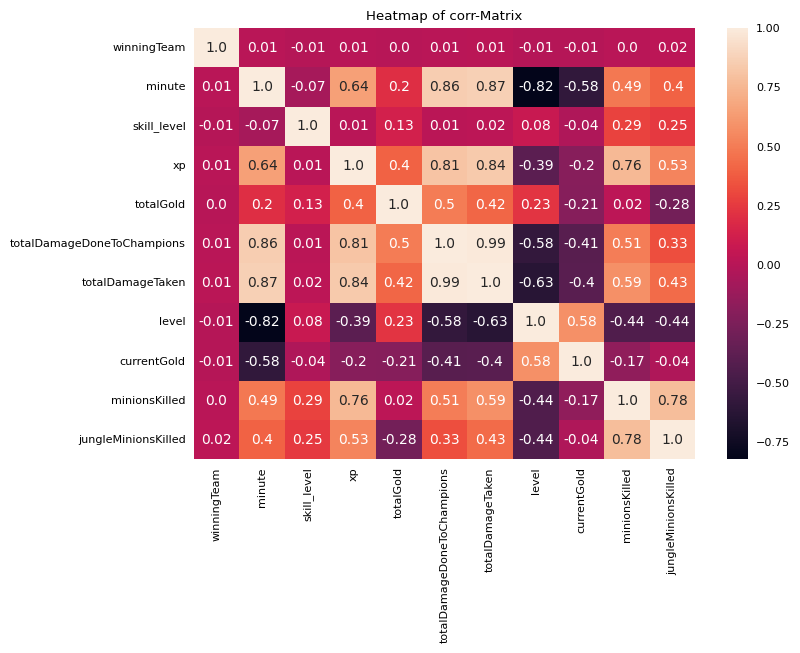

In [68]:
corr = normalized_df_sum.corr()

ax = plt.axes()

sns.heatmap(corr, annot=True, ax=ax)
for text in ax.texts:        
    t = float(text.get_text())                 
    text.set_text(round(t, 2)) 


ax.set_title('Heatmap of corr-Matrix')

plt.show()

#### Idee nur die Differenz zwischen den Teams zu betrachten! 

In [54]:
df_heatmap['xp'] = df_heatmap['xp_200']-df_heatmap['xp_100']
df_heatmap['totalGold'] = df_heatmap['totalGold_200']-df_heatmap['totalGold_100']
df_heatmap['totalDamageDoneToChampions'] = df_heatmap['totalDamageDoneToChampions_200']-df_heatmap['totalDamageDoneToChampions_100']
df_heatmap['totalDamageTaken'] = df_heatmap['totalDamageTaken_200']-df_heatmap['totalDamageTaken_100']
df_heatmap['level'] = df_heatmap['level_200']-df_heatmap['level_100']
df_heatmap['currentGold'] = df_heatmap['currentGold_200']-df_heatmap['currentGold_100']
df_heatmap['minionsKilled'] = df_heatmap['minionsKilled_200']-df_heatmap['minionsKilled_100']
df_heatmap['jungleMinionsKilled'] = df_heatmap['jungleMinionsKilled_200']-df_heatmap['jungleMinionsKilled_100']
           
col_to_drop = ['xp_100', 'xp_200',
       'totalGold_100', 'totalGold_200', 'totalDamageDoneToChampions_100',
       'totalDamageDoneToChampions_200', 'totalDamageTaken_100',
       'totalDamageTaken_200', 'level_100', 'level_200', 'currentGold_100',
       'currentGold_200', 'minionsKilled_100', 'minionsKilled_200',
       'jungleMinionsKilled_100', 'jungleMinionsKilled_200']

df_heatmap.drop(columns=col_to_drop, axis=1, inplace=True)

In [55]:
df_heatmap = df_heatmap.sample(frac=1).reset_index(drop=True)

In [56]:
#skill_level hat den Datentyp Objekt und muss in den Datentyp int konvertiert werden, um eine Heatmap zu erzeugen!
df_heatmap["skill_level"] = df_heatmap["skill_level"].astype(str).astype(int)

In [57]:
df_heatmap.keys()

Index(['winningTeam', 'minute', 'skill_level', 'xp', 'totalGold',
       'totalDamageDoneToChampions', 'totalDamageTaken', 'level',
       'currentGold', 'minionsKilled', 'jungleMinionsKilled'],
      dtype='object')

In [58]:
from sklearn import preprocessing

normalized_df = df_heatmap.copy()
for feature in normalized_df.columns:
    max_value = df_heatmap[feature].max()
    min_value = df_heatmap[feature].min()
    normalized_df[feature] = (df_heatmap[feature] - min_value) / (max_value - min_value)

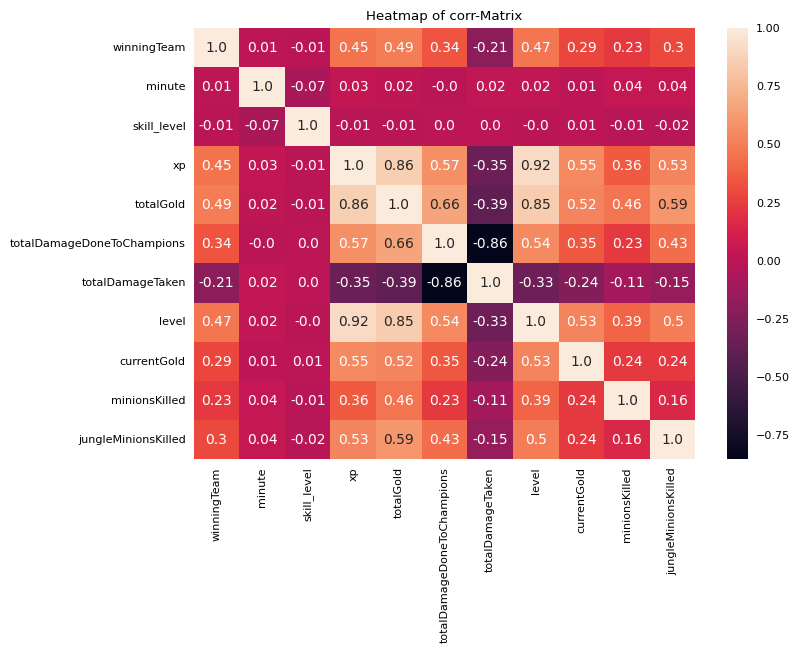

In [59]:
corr = normalized_df.corr()
ax = plt.axes()
sns.heatmap(corr, annot=True, ax=ax)

for text in ax.texts:        
    t = float(text.get_text())                 
    text.set_text(round(t, 2))    

ax.set_title('Heatmap of corr-Matrix')
plt.show()